In [70]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import requests
import numpy as np

In [ ]:
# Census Data https://data.census.gov/
# Land use/Land cover package https://geodata.dep.state.fl.us/datasets/FDEP::statewide-land-use-land-cover/about
# Counties Package https://www.arcgis.com/home/item.html?id=e1a7a11a570a49649a0c8770751667b6

In [4]:
gdf = gpd.read_file("/Users/ehast/Downloads/Statewide_Land_Use_Land_Cover")

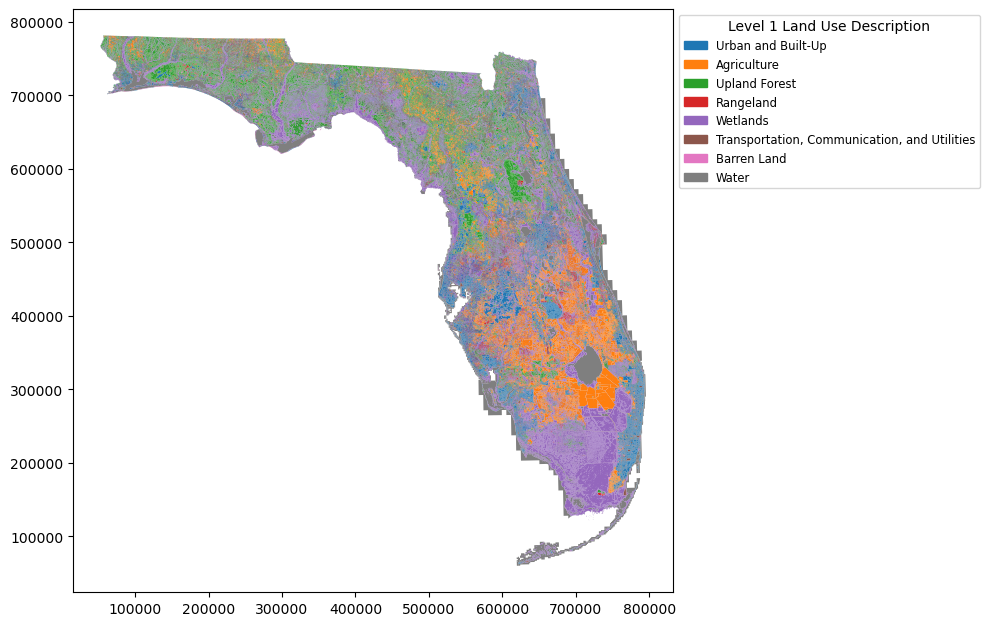

In [2]:
fig, ax = plt.subplots(figsize=(10, 10))

# Create a mapping of LEVEL1_LAN values to their descriptive names
landuse_mapping = dict(zip(gdf['LEVEL1_LAN'], gdf['LEVEL1_L_1']))

# Get a list of unique LEVEL1_LAN values
unique_values = gdf['LEVEL1_LAN'].unique()

# Create a colormap for the unique values
color_map = dict(zip(unique_values, mcolors.TABLEAU_COLORS))

# Loop through each group to plot
for code, group in gdf.groupby('LEVEL1_LAN'):
    color = color_map[code]
    group.plot(ax=ax, color=color)

# Create custom patches for the legend using the descriptive names
legend_patches = [Patch(color=color, label=landuse_mapping[code]) for code, color in color_map.items()]

# Set the legend
ax.legend(handles=legend_patches, title="Level 1 Land Use Description", loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Census Data, not sure about use now due to shapefile

In [16]:
url='https://api.census.gov/data/2020/dec/dhc'
params = {
    "get": 'NAME,P1_001N', 
    "for": "county:*",
    "in": "state:12",
    "key": "5520cc76d77e35f1499e60417bf7c8b45c69f66a"}
response = requests.get(url,params=params)

In [17]:
total_population=pd.DataFrame(response.json()[1:], columns=response.json()[0])
total_population

,NAME,P1_001N,state,county
0,"Alachua County, Florida",278468,12,001
1,"Baker County, Florida",28259,12,003
2,"Bay County, Florida",175216,12,005
3,"Bradford County, Florida",28303,12,007
4,"Brevard County, Florida",606612,12,009
...,...,...,...,...
62,"Union County, Florida",16147,12,125
63,"Volusia County, Florida",553543,12,127
64,"Wakulla County, Florida",33764,12,129
65,"Walton County, Florida",75305,12,131


In [48]:
print(total_population['P1_001N'].isna().sum())

0


In [21]:
shape_data = gdf
print(shape_data.columns)

Index(['OBJECTID', 'LANDUSE_CO', 'LANDUSE_DE', 'LEVEL1_LAN', 'LEVEL1_L_1',
       'LEVEL2_LAN', 'LEVEL2_L_1', 'LANDCOVER_', 'LANDCOVE_1', 'WATER_MANA',
       'LANDUSE_YE', 'SHAPEAREA', 'SHAPELEN', 'geometry'],
      dtype='object')


In [31]:
print(shape_data['LANDCOVE_1'])

0          1100: Low Density, <2 dwelling units/acre
1          1100: Low Density, <2 dwelling units/acre
2          1100: Low Density, <2 dwelling units/acre
3          1100: Low Density, <2 dwelling units/acre
4          1100: Low Density, <2 dwelling units/acre
                             ...                    
1416961      8370: Surface Water Collection Features
1416962      8370: Surface Water Collection Features
1416963      8370: Surface Water Collection Features
1416964      8370: Surface Water Collection Features
1416965      8370: Surface Water Collection Features
Name: LANDCOVE_1, Length: 1416966, dtype: object


In [34]:
counties_gdf = gpd.read_file('/Users/ehast/Desktop/mapdata')

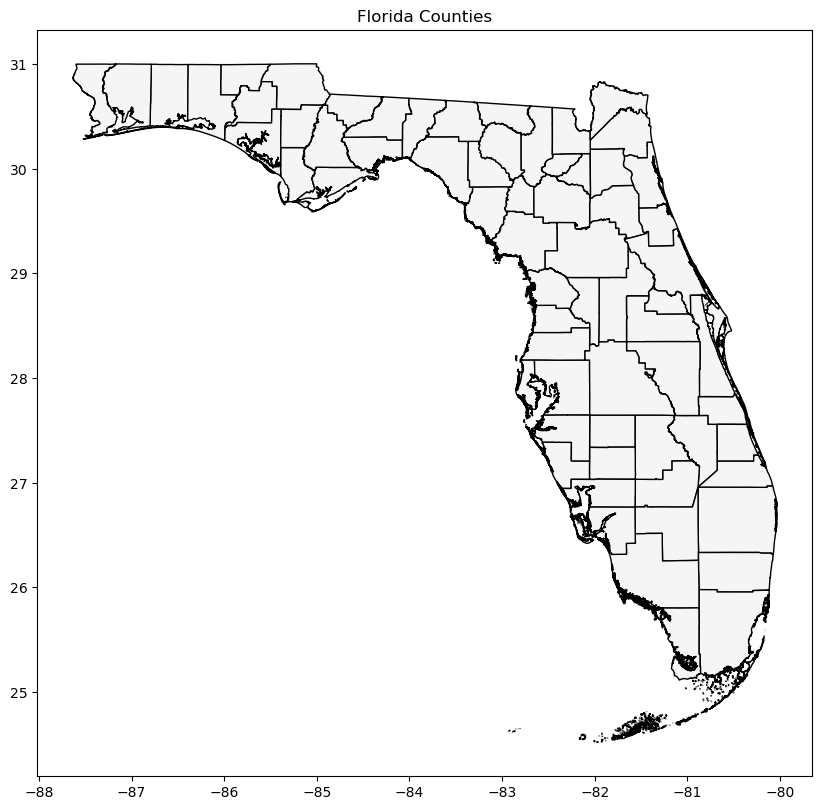

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
counties_gdf.plot(ax=ax, edgecolor="black", color="whitesmoke")
ax.set_title("Florida Counties")
plt.show()

In [36]:
# Check the CRS of both GeoDataFrames
print("Original shapefile CRS:", shape_data.crs)
print("County shapefile CRS:", counties_gdf.crs)

# Reprojecting to shape
if shape_data.crs != counties_gdf.crs:
    counties_gdf = counties_gdf.to_crs(shape_data.crs)


Original shapefile CRS: EPSG:6439
County shapefile CRS: EPSG:4326


In [93]:
combined_data = gpd.sjoin(shape_data, counties_gdf, how="left", predicate='intersects')

In [38]:
counties_gdf.columns

Index(['NAME', 'STATE_NAME', 'POP2000', 'POP00_SQMI', 'POP2010', 'POP10_SQMI',
       'WHITE', 'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE',
       'HISPANIC', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_21',
       'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64', 'AGE_65_UP',
       'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ',
       'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD',
       'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'VACANT',
       'OWNER_OCC', 'RENTER_OCC', 'NO_FARMS07', 'AVG_SIZE07', 'CROP_ACR07',
       'AVG_SALE07', 'SQMI', 'geometry'],
      dtype='object')

In [60]:
counties_gdf['NAME']

0     Okeechobee
1         Orange
2        Osceola
3     Palm Beach
4         Putnam
         ...    
62           Bay
63         Baker
64        Walton
65       Calhoun
66        Nassau
Name: NAME, Length: 67, dtype: object

In [62]:
print(combined_data.info()) # Plenty of features for possible use now.

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1429635 entries, 0 to 1416965
Data columns (total 61 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   OBJECTID     1429635 non-null  int64   
 1   LANDUSE_CO   1429635 non-null  int64   
 2   LANDUSE_DE   1429635 non-null  object  
 3   LEVEL1_LAN   1429635 non-null  int64   
 4   LEVEL1_L_1   1429635 non-null  object  
 5   LEVEL2_LAN   1429635 non-null  int64   
 6   LEVEL2_L_1   1429635 non-null  object  
 7   LANDCOVER_   1429635 non-null  int64   
 8   LANDCOVE_1   1429635 non-null  object  
 9   WATER_MANA   1429635 non-null  object  
 10  LANDUSE_YE   1429635 non-null  object  
 11  SHAPEAREA    1429635 non-null  float64 
 12  SHAPELEN     1429635 non-null  float64 
 13  geometry     1429635 non-null  geometry
 14  index_right  1426588 non-null  float64 
 15  NAME         1426588 non-null  object  
 16  STATE_NAME   1426588 non-null  object  
 17  POP2000      1426588 non

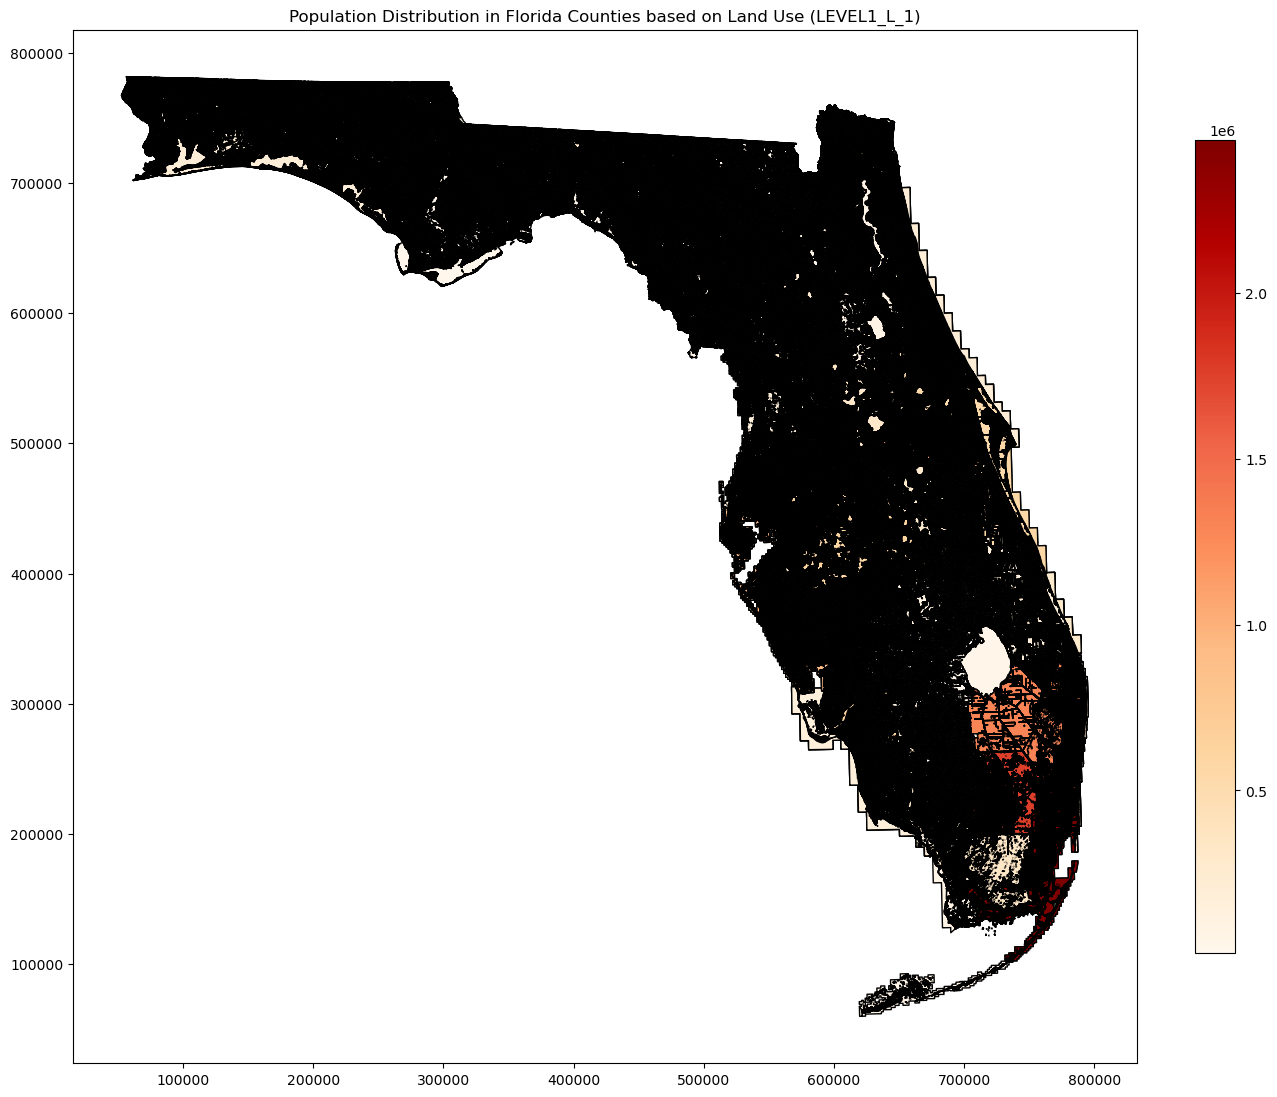

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot based on POP2010 and use a colormap to represent the different populations.
cmap = 'OrRd'
norm = mcolors.Normalize(vmin=combined_data['POP2010'].min(), vmax=combined_data['POP2010'].max())

combined_data.plot(column='POP2010', ax=ax, cmap=cmap, edgecolor='black')

# Set title
ax.set_title('Population Distribution in Florida Counties based on Land Use (LEVEL1_L_1)')

# Create the colorbar
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(cbar, ax=ax, orientation='vertical', fraction=0.035, pad=0.05)

plt.show()
#Can't really see anything

In [65]:
print(counties_gdf['NAME'].unique())

['Okeechobee' 'Orange' 'Osceola' 'Palm Beach' 'Putnam' 'Lake' 'Lafayette'
 'Indian River' 'Hardee' 'Glades' 'Gilchrist' 'Gulf' 'Pinellas'
 'Highlands' 'Hillsborough' 'Hendry' 'Hernando' 'Union' 'Taylor' 'Collier'
 'DeSoto' 'Dixie' 'Sarasota' 'Seminole' 'St. Lucie' 'Sumter' 'Levy' 'Lee'
 'Wakulla' 'St. Johns' 'Volusia' 'Pasco' 'Polk' 'Franklin' 'Flagler'
 'Brevard' 'Bradford' 'Alachua' 'Clay' 'Broward' 'Charlotte' 'Citrus'
 'Monroe' 'Miami-Dade' 'Martin' 'Marion' 'Manatee' 'Jackson' 'Holmes'
 'Okaloosa' 'Jefferson' 'Hamilton' 'Washington' 'Suwannee' 'Columbia'
 'Santa Rosa' 'Madison' 'Liberty' 'Leon' 'Escambia' 'Duval' 'Gadsden'
 'Bay' 'Baker' 'Walton' 'Calhoun' 'Nassau']


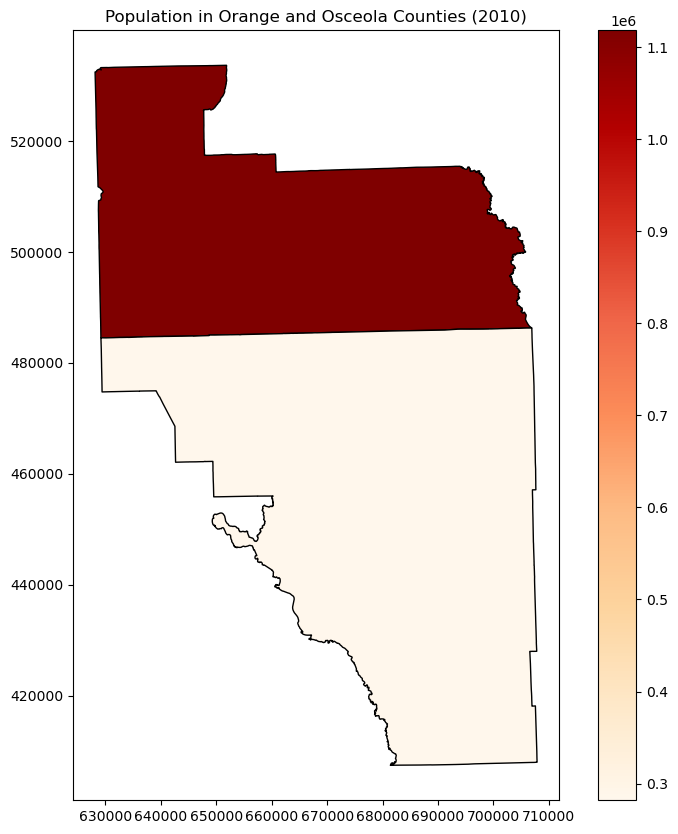

In [66]:
# Filter out only 'Orange' and 'Osceola' counties
orange_osceola = counties_gdf[counties_gdf['NAME'].isin(['Orange', 'Osceola'])]

# Checking if the filtered dataframe has any entries
if not orange_osceola.empty:
    # Plotting the data
    fig, ax = plt.subplots(figsize=(10, 10))
    orange_osceola.plot(column='POP2010', ax=ax, cmap='OrRd', edgecolor='black', legend=True)
    ax.set_title('Population in Orange and Osceola Counties (2010)')
    
    # Adjusting the legend
    leg = ax.get_legend()
    if leg:
        leg.set_bbox_to_anchor((1, 0.5))
    plt.show()
else:
    print("The filtered dataframe is empty.")


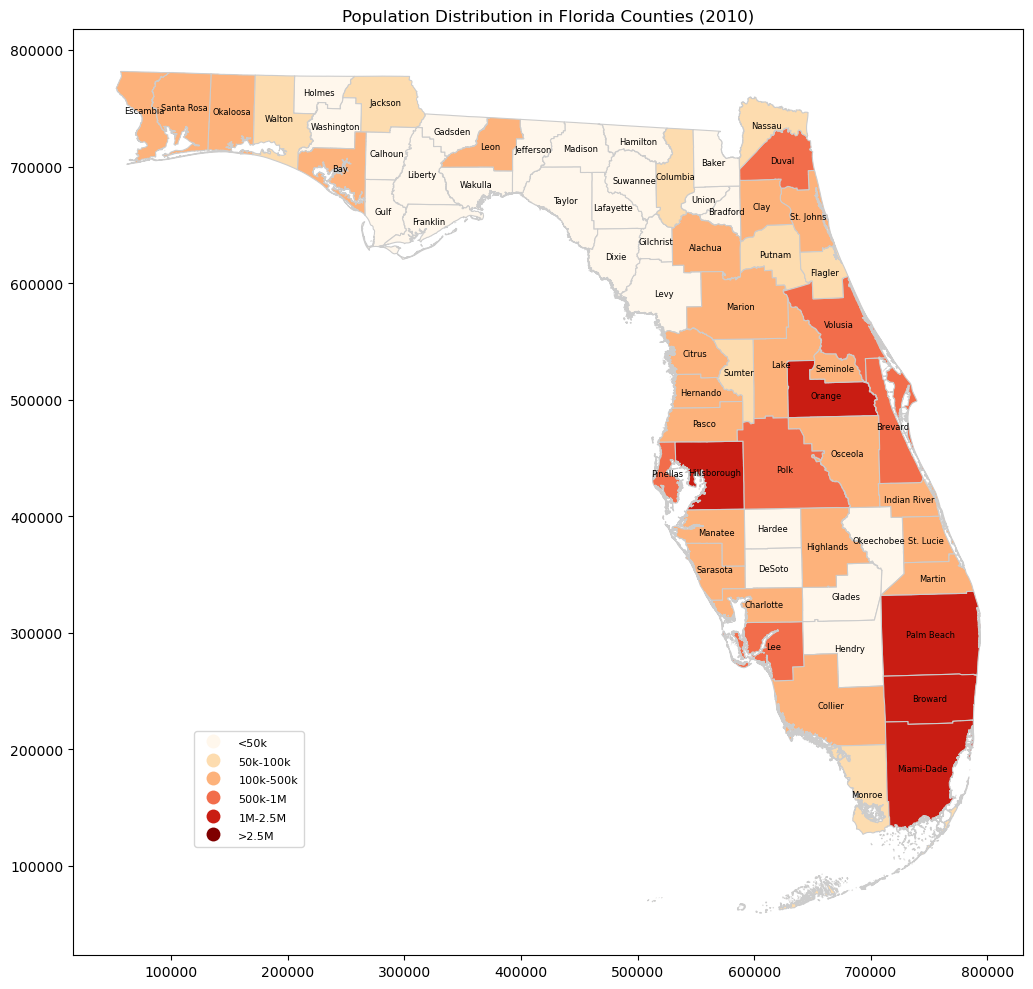

In [94]:
# Define custom bins for population
bin_edges = [0, 50000, 100000, 500000, 1000000, 2500000, 3000000]  
bin_labels = ['<50k', '50k-100k', '100k-500k', '500k-1M', '1M-2.5M', '>2.5M']


# Categorize the data
counties_gdf['category'] = pd.cut(counties_gdf['POP2010'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Create a custom colormap
colors = plt.cm.OrRd(np.linspace(0, 1, len(bin_edges) - 1))
cmap = plt.matplotlib.colors.ListedColormap(colors)

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 10))
counties_gdf.plot(column='category', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add county names to the plot
for x, y, label in zip(counties_gdf.geometry.centroid.x, counties_gdf.geometry.centroid.y, counties_gdf['NAME']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Adjust the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((0, 0, 0.25, 0.25))  # Adjust the bounding box to increase the size
for label in leg.get_texts():
    label.set_fontsize(8)  # Set text size
for handle in leg.legend_handles:
    handle.set_linewidth(2.0)  # Set line width

# Set title and adjust layout
ax.set_title('Population Distribution in Florida Counties (2010)')
fig.tight_layout()

plt.show()


In [92]:
counties_gdf['area'] = counties_gdf.geometry.area
counties_gdf['centroid_x'] = counties_gdf.geometry.centroid.x
counties_gdf['centroid_y'] = counties_gdf.geometry.centroid.y
counties_gdf['perimeter'] = counties_gdf.geometry.length